In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
i = 0

In [35]:
weights = 0
bias = 0
batch_size = 100
X_data = np.arange(100,step= 0.1)
Y_data = X_data+30*np.sin(X_data/10)
num_samples = X_data.shape[0]
X_data = np.reshape(X_data,(X_data.shape[0],1))
Y_data = np.reshape(Y_data,(Y_data.shape[0],1))
X = tf.placeholder(tf.float32,shape = (batch_size,1))
Y = tf.placeholder(tf.float32,shape = (batch_size,1))
W = tf.Variable(np.random.randn(),dtype = tf.float32)
b = tf.Variable(np.random.randn(),dtype = tf.float32)
Y_pred = X*W+b
loss  = tf.reduce_sum((Y-Y_pred)**2/batch_size)
opt = tf.train.AdamOptimizer(learning_rate = 0.1)
opt_operation = opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("W",sess.run(W))
    for  _ in range(1000):
        indices = np.random.choice(num_samples,batch_size)
        _ ,los = sess.run([opt_operation,loss],feed_dict={X:X_data[indices],Y:Y_data[indices]})
        weights,bias = (sess.run([W,b]))

W 1.1871504


In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(W))

[[0.03418176]]


In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    weights,bias = sess.run([W,b])
print(weights,bias)

-0.5697622 -0.47128364


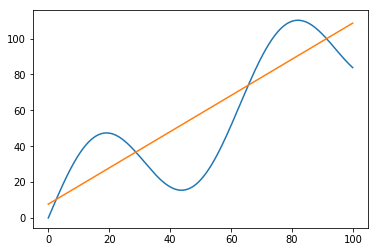

In [36]:
plt.plot(X_data,Y_data)
plt.plot(X_data,X_data*weights+bias)